In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf


In [159]:
train_df = pd.read_csv('/Users/jacobjones/github/datasci207_final_project/data/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Cleaning

In [160]:
#replace nulls with -99
train_df = train_df.fillna(-99)
train_df["LogSalesPrice"] = np.log(train_df.SalePrice)

# Model Building (Model 1)

In [161]:
train = train_df.sample(frac=.7)
val = train_df.drop(train.index)

In [203]:
def show_history(history):
  plt.plot(history.history['loss'], color='black', label='train')
  plt.plot(history.history['val_loss'], color='red', label='val')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

In [163]:
def build_model1():
    #clear session
    tf.keras.backend.clear_session()

    #inputs
    OverallQual = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='OverallQual')
    OverallQual_binned = tf.keras.layers.Discretization(num_bins=10)(OverallQual)
    GrLivArea = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='GrLivArea')

   
    #outputs
    LogSalesPrice = tf.keras.layers.Dense(
      units=1, activation='relu', name='LogSalesPrice')(OverallQual)

    model = tf.keras.Model(inputs=[OverallQual,GrLivArea],
                         outputs=LogSalesPrice,
                         name='HomePriceEstimate')

    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
      loss='MSE')
    

    return model


In [164]:
model = build_model1()
model.summary()

history = model.fit(
  x={
      'OverallQual': train[['OverallQual']],
      'GrLivArea': train[['GrLivArea']]},
  y=train[['LogSalesPrice']],
  epochs=15,
  batch_size=64,
  validation_data=(
      {'OverallQual': train[['OverallQual']],
      'GrLivArea': train[['GrLivArea']]},
      val[['LogSalesPrice']]),
  verbose=1)

show_history(history)

Model: "HomePriceEstimate"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 OverallQual (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 GrLivArea (InputLayer)         [(None, 1)]          0           []                               
                                                                                                  
 LogSalesPrice (Dense)          (None, 1)            2           ['OverallQual[0][0]']            
                                                                                                  
Total params: 2
Trainable params: 2
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/15
 1/16 [>...

ValueError: Data cardinality is ambiguous:
  x sizes: 1022, 1022
  y sizes: 438
Make sure all arrays contain the same number of samples.

# Model 2

In [ ]:
non_numeric_cols = train_df.columns[train_df.dtypes != 'int64']
train_df.loc(axis=1)[non_numeric_cols]

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LogSalesPrice
0,RL,65.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.247694
1,RL,80.0,Pave,-99,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.109011
2,RL,68.0,Pave,-99,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.317167
3,RL,60.0,Pave,-99,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,-99,-99,-99,WD,Abnorml,11.849398
4,RL,84.0,Pave,-99,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.072541
1456,RL,85.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,-99,MnPrv,-99,WD,Normal,12.254863
1457,RL,66.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,-99,GdPrv,Shed,WD,Normal,12.493130
1458,RL,68.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,-99,-99,-99,WD,Normal,11.864462


In [209]:
numeric_cols_train = train_df.drop(axis=1,labels = non_numeric_cols)

In [210]:
numeric_cols_train.shape

(1460, 35)

In [213]:
def build_model2():
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))

    model.compile(loss='MAPE', 
            optimizer='Adam', 
            metrics=['MAE'])
    return model

Epoch 1/13
19/19 [==============================] - 0s 6ms/step - loss: 99.6805 - MAE: 180054.5781 - val_loss: 99.4714 - val_MAE: 181364.2500
Epoch 2/13
19/19 [==============================] - 0s 2ms/step - loss: 99.2482 - MAE: 179342.3750 - val_loss: 98.8265 - val_MAE: 180293.2031
Epoch 3/13
19/19 [==============================] - 0s 2ms/step - loss: 98.3571 - MAE: 177852.3906 - val_loss: 97.4504 - val_MAE: 178008.5312
Epoch 4/13
19/19 [==============================] - 0s 2ms/step - loss: 96.4636 - MAE: 174699.7344 - val_loss: 94.5736 - val_MAE: 173247.3438
Epoch 5/13
19/19 [==============================] - 0s 2ms/step - loss: 92.6203 - MAE: 168400.9062 - val_loss: 88.9201 - val_MAE: 163896.5000
Epoch 6/13
19/19 [==============================] - 0s 2ms/step - loss: 85.4465 - MAE: 156642.1562 - val_loss: 78.8924 - val_MAE: 147271.6094
Epoch 7/13
19/19 [==============================] - 0s 2ms/step - loss: 73.5130 - MAE: 136814.0938 - val_loss: 64.2712 - val_MAE: 121846.6719
Epoch 

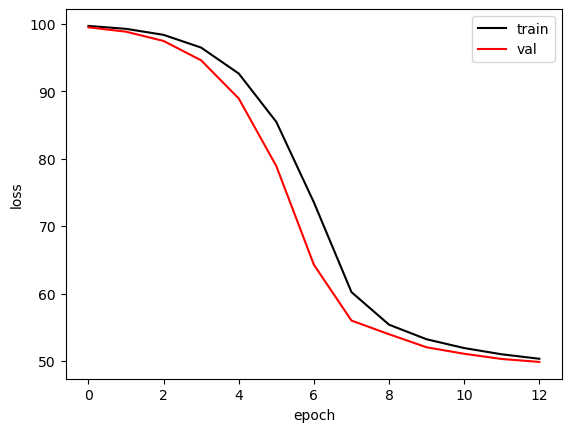

In [215]:
model2 = build_model2()
history = model2.fit(
    x=numeric_cols_train.drop(axis=1,labels="SalePrice"),
    y=numeric_cols_train.SalePrice,
    epochs=13,
    batch_size=64,
    validation_split=.2,
    verbose=1)
show_history(history)